## Importing Pre-requisite Packages and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re

In [2]:
data = pd.read_csv("Global_Superstore2.csv")

## Data Understanding

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [4]:
data.shape

(51290, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [6]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [7]:
data.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

In [8]:
data.select_dtypes(include=np.number).head()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
0,32298,10024.0,2309.650,7,0.0,762.1845,933.57
1,26341,NaN,3709.395,9,0.1,-288.7650,923.63
2,25330,NaN,5175.171,9,0.1,919.9710,915.49
3,13524,NaN,2892.510,5,0.1,-96.5400,910.16
4,47221,NaN,2832.960,8,0.0,311.5200,903.04


In [9]:
data.select_dtypes(include=np.object).head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,Critical
1,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",Critical
2,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",Medium
3,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",Medium
4,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",Critical


## Data Cleaning and Preparation

In [10]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [11]:
data.columns = [i.replace(" ","") for i in data.columns]
data.columns = [i.replace("-","") for i in data.columns]

In [12]:
data.columns

Index(['RowID', 'OrderID', 'OrderDate', 'ShipDate', 'ShipMode', 'CustomerID',
       'CustomerName', 'Segment', 'City', 'State', 'Country', 'PostalCode',
       'Market', 'Region', 'ProductID', 'Category', 'SubCategory',
       'ProductName', 'Sales', 'Quantity', 'Discount', 'Profit',
       'ShippingCost', 'OrderPriority'],
      dtype='object')

In [13]:
data.RowID = data.RowID.astype("object")

In [14]:
data.PostalCode = data.PostalCode.astype("object")

In [15]:
data.ShipDate = pd.to_datetime(data.ShipDate)
data.OrderDate = pd.to_datetime(data.OrderDate)

In [16]:
data.select_dtypes(include=np.number).head()

,Sales,Quantity,Discount,Profit,ShippingCost
0,2309.650,7,0.0,762.1845,933.57
1,3709.395,9,0.1,-288.7650,923.63
2,5175.171,9,0.1,919.9710,915.49
3,2892.510,5,0.1,-96.5400,910.16
4,2832.960,8,0.0,311.5200,903.04


In [17]:
data.select_dtypes(include=np.object).head()

,RowID,OrderID,ShipMode,CustomerID,CustomerName,Segment,City,State,Country,PostalCode,Market,Region,ProductID,Category,SubCategory,ProductName,OrderPriority
0,32298,CA-2012-124891,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,Critical
1,26341,IN-2013-77878,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",Critical
2,25330,IN-2013-71249,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",Medium
3,13524,ES-2013-1579342,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",Medium
4,47221,SG-2013-4320,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",Critical


In [18]:
data.drop("RowID",axis=1,inplace=True)

In [19]:
## Checking for lead spaces
for col in data.select_dtypes(include=np.object).drop("PostalCode",axis=1):
    for i in data[col]:
        if i.strip() != i:
            print(col)
            break

ProductName


In [20]:
data.ProductName = data.ProductName.apply(lambda x:x.strip())

In [21]:
## Getting rid of unneccessary characters causing problems in encoding when needed to export to mysql.
data.ProductName = data.ProductName.apply(lambda x:"".join(re.findall(r"[A-Za-z0-9- ]+",x)))

In [22]:
## Getting rid of unneccessary characters causing problems in encoding when needed to export to mysql.
data.CustomerName = data.CustomerName.apply(lambda x:"".join(re.findall(r"[A-Za-z0-9- ]+",x)))

In [23]:
## Getting rid of Postal code as Place information given
data.drop("PostalCode",axis=1,inplace=True)

In [24]:
## Getting rid of 
data.drop(["State","City"],axis=1,inplace=True)

In [25]:
data["DaysTillShipment"] = data.ShipDate - data.OrderDate
data.head()

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,Market,Region,...,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,DaysTillShipment
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,United States,US,East,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,0 days
1,IN-2013-77878,2013-05-02,2013-07-02,Second Class,JR-16210,Justin Ritter,Corporate,Australia,APAC,Oceania,...,Furniture,Chairs,Novimex Executive Leather Armchair Black,3709.395,9,0.1,-288.7650,923.63,Critical,61 days
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Australia,APAC,Oceania,...,Technology,Phones,Nokia Smart Phone with Caller ID,5175.171,9,0.1,919.9710,915.49,Medium,1 days
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Germany,EU,Central,...,Technology,Phones,Motorola Smart Phone Cordless,2892.510,5,0.1,-96.5400,910.16,Medium,2 days
4,SG-2013-4320,2013-05-11,2013-06-11,Same Day,RH-9495,Rick Hansen,Consumer,Senegal,Africa,Africa,...,Technology,Copiers,Sharp Wireless Fax High-Speed,2832.960,8,0.0,311.5200,903.04,Critical,31 days


In [26]:
data.DaysTillShipment = data.DaysTillShipment.apply(lambda x:x.days)
data.head()

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,Market,Region,...,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,DaysTillShipment
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,United States,US,East,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,0
1,IN-2013-77878,2013-05-02,2013-07-02,Second Class,JR-16210,Justin Ritter,Corporate,Australia,APAC,Oceania,...,Furniture,Chairs,Novimex Executive Leather Armchair Black,3709.395,9,0.1,-288.7650,923.63,Critical,61
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Australia,APAC,Oceania,...,Technology,Phones,Nokia Smart Phone with Caller ID,5175.171,9,0.1,919.9710,915.49,Medium,1
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Germany,EU,Central,...,Technology,Phones,Motorola Smart Phone Cordless,2892.510,5,0.1,-96.5400,910.16,Medium,2
4,SG-2013-4320,2013-05-11,2013-06-11,Same Day,RH-9495,Rick Hansen,Consumer,Senegal,Africa,Africa,...,Technology,Copiers,Sharp Wireless Fax High-Speed,2832.960,8,0.0,311.5200,903.04,Critical,31


In [27]:
data["OrderDay"] = data.OrderDate.apply(lambda x:"Weekend Order" if x.weekday() >= 5 else "Weekday Order")
data.head()

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,Market,Region,...,SubCategory,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,DaysTillShipment,OrderDay
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,United States,US,East,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,0,Weekday Order
1,IN-2013-77878,2013-05-02,2013-07-02,Second Class,JR-16210,Justin Ritter,Corporate,Australia,APAC,Oceania,...,Chairs,Novimex Executive Leather Armchair Black,3709.395,9,0.1,-288.7650,923.63,Critical,61,Weekday Order
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Australia,APAC,Oceania,...,Phones,Nokia Smart Phone with Caller ID,5175.171,9,0.1,919.9710,915.49,Medium,1,Weekday Order
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Germany,EU,Central,...,Phones,Motorola Smart Phone Cordless,2892.510,5,0.1,-96.5400,910.16,Medium,2,Weekday Order
4,SG-2013-4320,2013-05-11,2013-06-11,Same Day,RH-9495,Rick Hansen,Consumer,Senegal,Africa,Africa,...,Copiers,Sharp Wireless Fax High-Speed,2832.960,8,0.0,311.5200,903.04,Critical,31,Weekend Order


In [28]:
data.Region.unique()

array(['East', 'Oceania', 'Central', 'Africa', 'West', 'South',
       'Central Asia', 'EMEA', 'North Asia', 'North', 'Caribbean',
       'Southeast Asia', 'Canada'], dtype=object)

In [29]:
data.Market.unique()

array(['US', 'APAC', 'EU', 'Africa', 'EMEA', 'LATAM', 'Canada'],
      dtype=object)

In [30]:
## In market, there could be many overlapping countries between EU and EMEA.
## Hence, we would drop market and use regions
data.drop("Market",axis=1,inplace=True)

## Creating New Region codes using World Indicators Dataset

In [31]:
wd = pd.read_csv("WDICountry.csv")

In [32]:
wd = wd[['Country Code', 'Short Name','Long Name','Region']]

In [33]:
wd.head()

,Country Code,Short Name,Long Name,Region
0,ABW,Aruba,Aruba,Latin America & Caribbean
1,AFG,Afghanistan,Islamic State of Afghanistan,South Asia
2,AGO,Angola,People's Republic of Angola,Sub-Saharan Africa
3,ALB,Albania,Republic of Albania,Europe & Central Asia
4,AND,Andorra,Principality of Andorra,Europe & Central Asia


In [34]:
wd["Short Name"].sort_values().tail(30)

243                    Tanzania
230                    Thailand
21                  The Bahamas
84                   The Gambia
234                 Timor-Leste
229                        Togo
236                       Tonga
239         Trinidad and Tobago
240                     Tunisia
241                      Turkey
232                Turkmenistan
225    Turks and Caicos Islands
242                      Tuvalu
244                      Uganda
245                     Ukraine
6          United Arab Emirates
79               United Kingdom
248               United States
246         Upper middle income
247                     Uruguay
249                  Uzbekistan
255                     Vanuatu
251                   Venezuela
254                     Vietnam
253              Virgin Islands
193          West Bank and Gaza
256                       World
259                       Yemen
261                      Zambia
262                    Zimbabwe
Name: Short Name, dtype: object

In [35]:
data_countries = pd.DataFrame({"Country":data["Country"].unique()})

In [36]:
data_countries = data_countries.merge(wd,how="left",left_on="Country",right_on="Short Name")

In [37]:
data_countries[data_countries.isnull().any(axis=1)]

,Country,Country Code,Short Name,Long Name,Region
16,Taiwan,NaN,NaN,NaN,NaN
19,Democratic Republic of the Congo,NaN,NaN,NaN,NaN
73,Myanmar (Burma),NaN,NaN,NaN,NaN
76,Republic of the Congo,NaN,NaN,NaN,NaN
79,South Korea,NaN,NaN,NaN,NaN
82,Cote d'Ivoire,NaN,NaN,NaN,NaN
90,Martinique,NaN,NaN,NaN,NaN
91,Syria,NaN,NaN,NaN,NaN
121,Hong Kong,NaN,NaN,NaN,NaN
123,Guadeloupe,NaN,NaN,NaN,NaN


In [38]:
wd.head()

,Country Code,Short Name,Long Name,Region
0,ABW,Aruba,Aruba,Latin America & Caribbean
1,AFG,Afghanistan,Islamic State of Afghanistan,South Asia
2,AGO,Angola,People's Republic of Angola,Sub-Saharan Africa
3,ALB,Albania,Republic of Albania,Europe & Central Asia
4,AND,Andorra,Principality of Andorra,Europe & Central Asia


In [39]:
try:
    print(wd[wd["Country Code"] == "TWN"])
    data_countries.iloc[16,1:] = wd[wd["Country Code"] == "TWN"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

Empty DataFrame
Columns: [Country Code, Short Name, Long Name, Region]
Index: []
Country info doesnt exist in World Indicators Dataset


In [40]:
data_countries.iloc[16,1:] = ["TWN","Taiwan",np.nan,"East Asia & Pacific"]

In [41]:
print(wd[wd["Short Name"] == "Myanmar"])
data_countries.iloc[73,1:] = wd[wd["Short Name"] == "Myanmar"]

    Country Code Short Name                         Long Name  \
157          MMR    Myanmar  Republic of the Union of Myanmar   

                  Region  
157  East Asia & Pacific  


In [42]:
print(wd[wd["Short Name"] == "Congo"])
data_countries.iloc[[19,76],1:] = wd[wd["Short Name"] == "Congo"]

   Country Code Short Name          Long Name              Region
42          COG      Congo  Republic of Congo  Sub-Saharan Africa


In [43]:
try:
    print(wd[wd["Country Code"] == "COD"])
    data_countries.iloc[19,1:] = wd[wd["Country Code"] == "COD"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

   Country Code       Short Name                         Long Name  \
41          COD  Dem. Rep. Congo  Democratic Republic of the Congo   

                Region  
41  Sub-Saharan Africa  


In [44]:
try:
    print(wd[wd["Country Code"] == "COG"])
    data_countries.iloc[76,1:] = wd[wd["Country Code"] == "COG"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

   Country Code Short Name          Long Name              Region
42          COG      Congo  Republic of Congo  Sub-Saharan Africa


In [45]:
try:
    print(wd[wd["Country Code"] == "KOR"])
    data_countries.iloc[79,1:] = wd[wd["Country Code"] == "KOR"]

except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

    Country Code Short Name          Long Name               Region
123          KOR      Korea  Republic of Korea  East Asia & Pacific


In [46]:
try:
    print(wd[wd["Country Code"] == "CIV"])
    data_countries.iloc[82,1:] = wd[wd["Country Code"] == "CIV"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

   Country Code     Short Name                  Long Name              Region
39          CIV  Côte d'Ivoire  Republic of Côte d'Ivoire  Sub-Saharan Africa


In [47]:
try:
    print(wd[wd["Country Code"] == "MTQ"])
    data_countries.iloc[90,1:] = wd[wd["Country Code"] == "MTQ"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

Empty DataFrame
Columns: [Country Code, Short Name, Long Name, Region]
Index: []
Country info doesnt exist in World Indicators Dataset


In [48]:
data_countries.iloc[90,1:] = ["MTQ","Martinique",np.nan,"Latin America & Caribbean"]

In [49]:
try:
    print(wd[wd["Country Code"] == "SYR"])
    data_countries.iloc[91,1:] = wd[wd["Country Code"] == "SYR"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

    Country Code            Short Name             Long Name  \
224          SYR  Syrian Arab Republic  Syrian Arab Republic   

                         Region  
224  Middle East & North Africa  


In [50]:
print(wd[wd["Country Code"] == "HKG"])
data_countries.iloc[121,1:] = wd[wd["Country Code"] == "HKG"]

try:
    print(wd[wd["Country Code"] == "HKG"])
    data_countries.iloc[121,1:] = wd[wd["Country Code"] == "HKG"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

   Country Code            Short Name  \
94          HKG  Hong Kong SAR, China   

                                            Long Name               Region  
94  Hong Kong Special Administrative Region of the...  East Asia & Pacific  
   Country Code            Short Name  \
94          HKG  Hong Kong SAR, China   

                                            Long Name               Region  
94  Hong Kong Special Administrative Region of the...  East Asia & Pacific  


In [51]:
try:
    print(wd[wd["Country Code"] == "GLP"])
    data_countries.iloc[123,1:] = wd[wd["Country Code"] == "GLP"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

Empty DataFrame
Columns: [Country Code, Short Name, Long Name, Region]
Index: []
Country info doesnt exist in World Indicators Dataset


In [52]:
data_countries.iloc[123,1:] = ["GLP","Guadeloupe",np.nan,"Latin America & Caribbean"]

In [53]:
try:
    print(wd[wd["Country Code"] == "KGZ"])
    data_countries.iloc[124,1:] = wd[wd["Country Code"] == "KGZ"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

    Country Code       Short Name        Long Name                 Region
119          KGZ  Kyrgyz Republic  Kyrgyz Republic  Europe & Central Asia


In [54]:
try:
    print(wd[wd["Country Code"] == "SWZ"])
    data_countries.iloc[134,1:] = wd[wd["Country Code"] == "SWZ"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

    Country Code Short Name            Long Name              Region
221          SWZ   Eswatini  Kingdom of Eswatini  Sub-Saharan Africa


In [55]:
print(wd[wd["Country Code"] == "SVK"])
data_countries.iloc[139,1:] = wd[wd["Country Code"] == "SVK"]

try:
    print(wd[wd["Country Code"] == "SVK"])
    data_countries.iloc[139,1:] = wd[wd["Country Code"] == "SVK"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

    Country Code       Short Name        Long Name                 Region
218          SVK  Slovak Republic  Slovak Republic  Europe & Central Asia
    Country Code       Short Name        Long Name                 Region
218          SVK  Slovak Republic  Slovak Republic  Europe & Central Asia


In [56]:
try:
    print(wd[wd["Country Code"] == "MKD"])
    data_countries.iloc[143,1:] = wd[wd["Country Code"] == "MKD"]
except ValueError:
    print('Country info doesnt exist in World Indicators Dataset')

    Country Code       Short Name                    Long Name  \
154          MKD  North Macedonia  Republic of North Macedonia   

                    Region  
154  Europe & Central Asia  


In [57]:
data_countries[data_countries["Region"].isnull()]

,Country,Country Code,Short Name,Long Name,Region


In [58]:
## Replacing the Region with new regions from World Indicators dataset

new_regions = data_countries[["Country","Region","Short Name"]]

new_regions.columns = ["Country","NewRegion","CountryName"]

data = data.merge(new_regions,left_on="Country",right_on="Country")

data.drop(["Region","Country"],axis=1,inplace=True)

In [59]:
data.head()

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,ProductID,Category,SubCategory,...,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,DaysTillShipment,OrderDay,NewRegion,CountryName
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,TEC-AC-10003033,Technology,Accessories,...,2309.650,7,0.0,762.1845,933.57,Critical,0,Weekday Order,North America,United States
1,CA-2014-135909,2014-10-14,2014-10-21,Standard Class,JW-15220,Jane Waco,Corporate,OFF-BI-10003527,Office Supplies,Binders,...,5083.960,5,0.2,1906.4850,867.69,Low,7,Weekday Order,North America,United States
2,CA-2012-116638,2012-01-28,2012-01-31,Second Class,JH-15985,Joseph Holt,Consumer,FUR-TA-10000198,Furniture,Tables,...,4297.644,13,0.4,-1862.3124,865.74,Critical,3,Weekend Order,North America,United States
3,CA-2011-102988,2011-05-04,2011-09-04,Second Class,GM-14695,Greg Maxwell,Corporate,OFF-SU-10002881,Office Supplies,Supplies,...,4164.050,5,0.0,83.2810,846.54,High,123,Weekday Order,North America,United States
4,CA-2014-143567,2014-03-11,2014-06-11,Second Class,TB-21175,Thomas Boland,Corporate,TEC-AC-10004145,Technology,Accessories,...,2249.910,9,0.0,517.4793,780.70,Critical,92,Weekday Order,North America,United States


In [60]:
data.NewRegion.value_counts()

Europe & Central Asia         13389
North America                 10378
Latin America & Caribbean     10294
East Asia & Pacific            8990
Sub-Saharan Africa             3389
Middle East & North Africa     2802
South Asia                     2048
Name: NewRegion, dtype: int64

In [61]:
data["Region"] = data.NewRegion

data.drop("NewRegion",axis=1,inplace=True)

In [62]:
data["Country"] = data.CountryName

data.drop("CountryName",axis=1,inplace=True)

## Transforming dataset for RFM Clustering

In [63]:
data.head()

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,ProductID,Category,SubCategory,...,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,DaysTillShipment,OrderDay,Region,Country
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,TEC-AC-10003033,Technology,Accessories,...,2309.650,7,0.0,762.1845,933.57,Critical,0,Weekday Order,North America,United States
1,CA-2014-135909,2014-10-14,2014-10-21,Standard Class,JW-15220,Jane Waco,Corporate,OFF-BI-10003527,Office Supplies,Binders,...,5083.960,5,0.2,1906.4850,867.69,Low,7,Weekday Order,North America,United States
2,CA-2012-116638,2012-01-28,2012-01-31,Second Class,JH-15985,Joseph Holt,Consumer,FUR-TA-10000198,Furniture,Tables,...,4297.644,13,0.4,-1862.3124,865.74,Critical,3,Weekend Order,North America,United States
3,CA-2011-102988,2011-05-04,2011-09-04,Second Class,GM-14695,Greg Maxwell,Corporate,OFF-SU-10002881,Office Supplies,Supplies,...,4164.050,5,0.0,83.2810,846.54,High,123,Weekday Order,North America,United States
4,CA-2014-143567,2014-03-11,2014-06-11,Second Class,TB-21175,Thomas Boland,Corporate,TEC-AC-10004145,Technology,Accessories,...,2249.910,9,0.0,517.4793,780.70,Critical,92,Weekday Order,North America,United States


In [64]:
customers = pd.DataFrame({"CustomerID":data.CustomerID.unique()})
customers.head()

,CustomerID
0,RH-19495
1,JW-15220
2,JH-15985
3,GM-14695
4,TB-21175


In [65]:
recency = data.groupby("CustomerID").agg({"OrderDate":"max"}).apply(lambda x:(data.OrderDate.max() - x)).reset_index()
recency.head()

,CustomerID,OrderDate
0,AA-10315,8 days
1,AA-10375,6 days
2,AA-10480,117 days
3,AA-10645,26 days
4,AA-315,2 days


In [66]:
customers = pd.merge(customers,recency,left_on="CustomerID",right_on="CustomerID")
customers.head()

,CustomerID,OrderDate
0,RH-19495,30 days
1,JW-15220,12 days
2,JH-15985,11 days
3,GM-14695,22 days
4,TB-21175,20 days


In [67]:
frequency = data.drop_duplicates("OrderID",keep="first").groupby("CustomerID").agg({"OrderID":"count"}).reset_index()

In [68]:
customers = pd.merge(customers,frequency,left_on="CustomerID",right_on="CustomerID")
customers.head()

,CustomerID,OrderDate,OrderID
0,RH-19495,30 days,28
1,JW-15220,12 days,33
2,JH-15985,11 days,37
3,GM-14695,22 days,17
4,TB-21175,20 days,27


In [69]:
monetary = data.groupby("CustomerID").agg({"Sales":"sum"}).reset_index()
monetary.head()

,CustomerID,Sales
0,AA-10315,13747.41300
1,AA-10375,5884.19500
2,AA-10480,17695.58978
3,AA-10645,15343.89070
4,AA-315,2243.25600


In [70]:
customers = customers.merge(monetary,left_on="CustomerID",right_on="CustomerID")
customers.head()

,CustomerID,OrderDate,OrderID,Sales
0,RH-19495,30 days,28,13295.7486
1,JW-15220,12 days,33,23103.7263
2,JH-15985,11 days,37,18863.4044
3,GM-14695,22 days,17,14564.9420
4,TB-21175,20 days,27,16573.5984


In [71]:
customers.columns = ["CustomerID","Recency","Frequency","Monetary"]

In [72]:
customers.head()

,CustomerID,Recency,Frequency,Monetary
0,RH-19495,30 days,28,13295.7486
1,JW-15220,12 days,33,23103.7263
2,JH-15985,11 days,37,18863.4044
3,GM-14695,22 days,17,14564.9420
4,TB-21175,20 days,27,16573.5984


In [73]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 0 to 1588
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   CustomerID  1589 non-null   object         
 1   Recency     1589 non-null   timedelta64[ns]
 2   Frequency   1589 non-null   int64          
 3   Monetary    1589 non-null   float64        
dtypes: float64(1), int64(1), object(1), timedelta64[ns](1)
memory usage: 62.1+ KB


In [74]:
customers.Recency = customers.Recency.apply(lambda x:x.days)

In [75]:
customers.head()

,CustomerID,Recency,Frequency,Monetary
0,RH-19495,30,28,13295.7486
1,JW-15220,12,33,23103.7263
2,JH-15985,11,37,18863.4044
3,GM-14695,22,17,14564.9420
4,TB-21175,20,27,16573.5984


In [76]:
customers.set_index("CustomerID",inplace=True)
customers.head()

,Recency,Frequency,Monetary
CustomerID,,,
RH-19495,30,28,13295.7486
JW-15220,12,33,23103.7263
JH-15985,11,37,18863.4044
GM-14695,22,17,14564.9420
TB-21175,20,27,16573.5984


In [77]:
customers.skew()

Recency      3.028140
Frequency    0.241142
Monetary     0.755698
dtype: float64

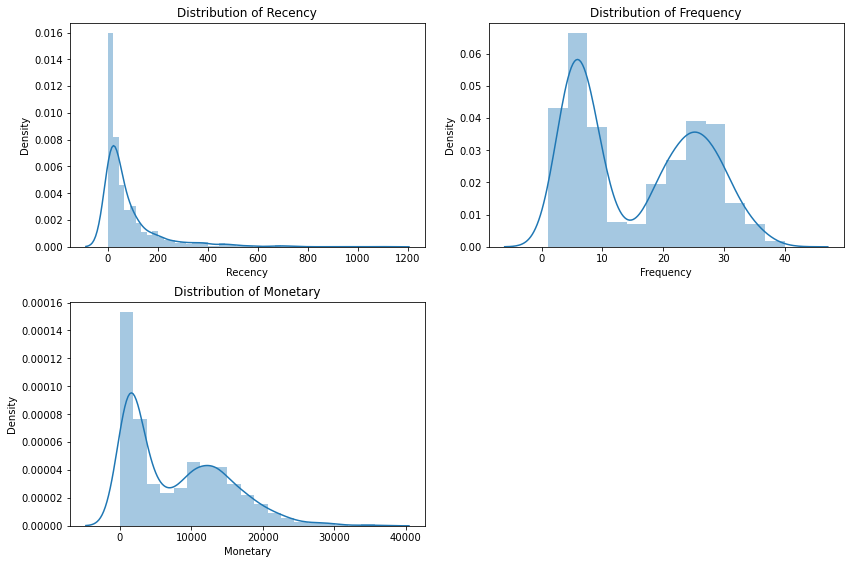

In [78]:
plt.figure(figsize=(12,8))
for index,i in enumerate(customers.columns):
    plt.subplot(2,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    plt.title(f"Distribution of {i}")
    sns.distplot(customers[i])

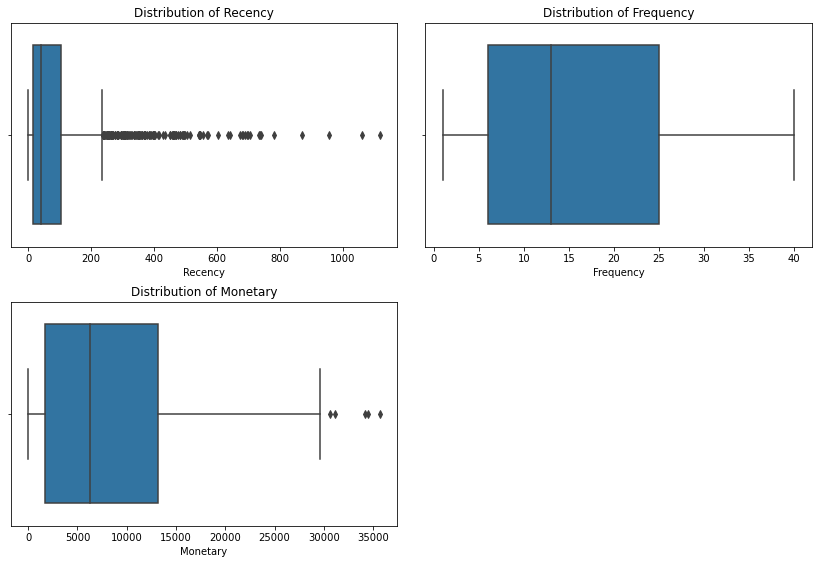

In [79]:
plt.figure(figsize=(12,8))
for index,i in enumerate(customers.columns):
    plt.subplot(2,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    plt.title(f"Distribution of {i}")
    sns.boxplot(customers[i])

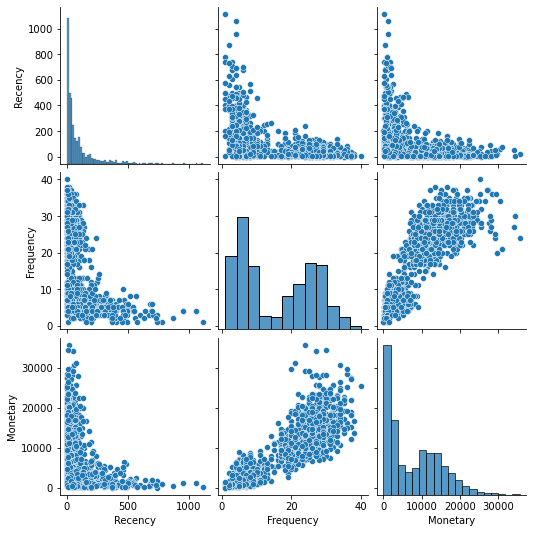

In [80]:
sns.pairplot(customers)

In [81]:
X = customers.copy()
X.head()

,Recency,Frequency,Monetary
CustomerID,,,
RH-19495,30,28,13295.7486
JW-15220,12,33,23103.7263
JH-15985,11,37,18863.4044
GM-14695,22,17,14564.9420
TB-21175,20,27,16573.5984


In [82]:
from sklearn.preprocessing import StandardScaler,PowerTransformer

PT = PowerTransformer().fit(X)
X = pd.DataFrame(PT.transform(X),columns=X.columns)
X.head()

,Recency,Frequency,Monetary
0,-0.189353,1.116024,0.890317
1,-0.764874,1.399641,1.567319
2,-0.815675,1.606009,1.306427
3,-0.392072,0.341166,0.994819
4,-0.452791,1.055225,1.147624


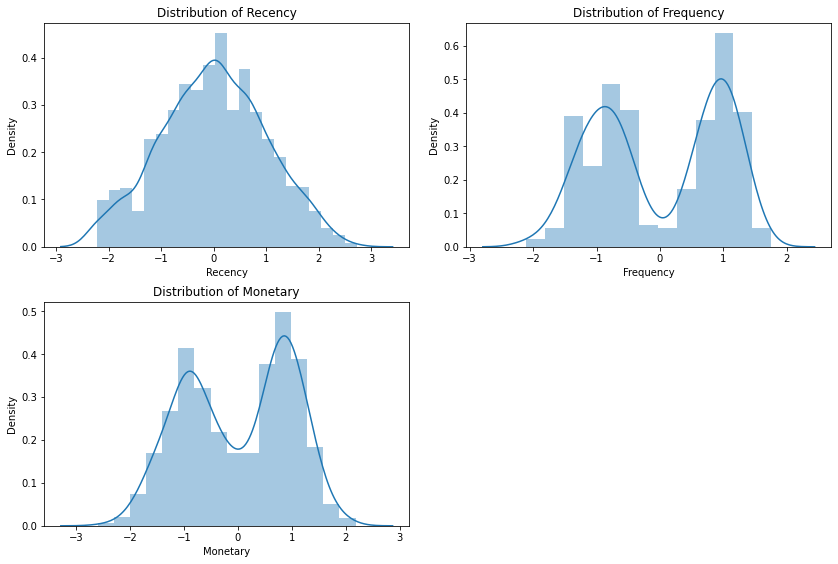

In [83]:
plt.figure(figsize=(12,8))
for index,i in enumerate(X.columns):
    plt.subplot(2,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    plt.title(f"Distribution of {i}")
    sns.distplot(X[i])

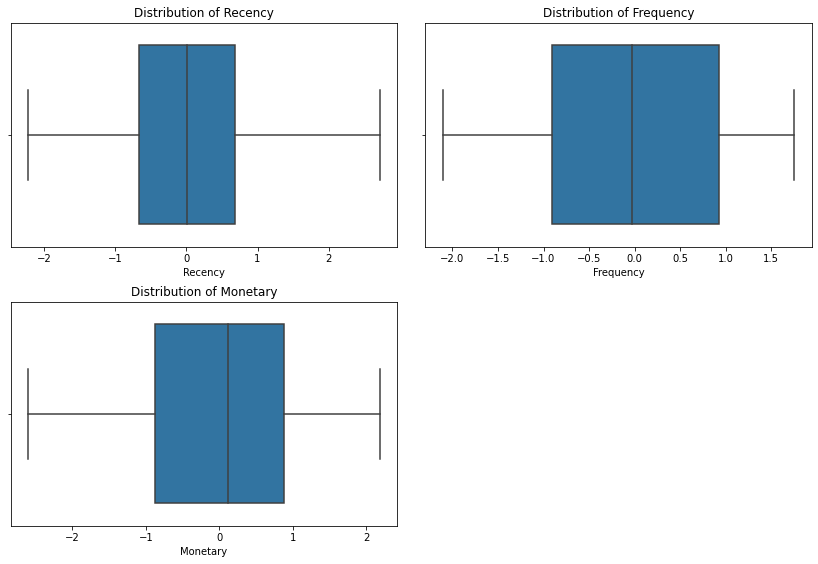

In [84]:
plt.figure(figsize=(12,8))
for index,i in enumerate(X.columns):
    plt.subplot(2,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    plt.title(f"Distribution of {i}")
    sns.boxplot(X[i])

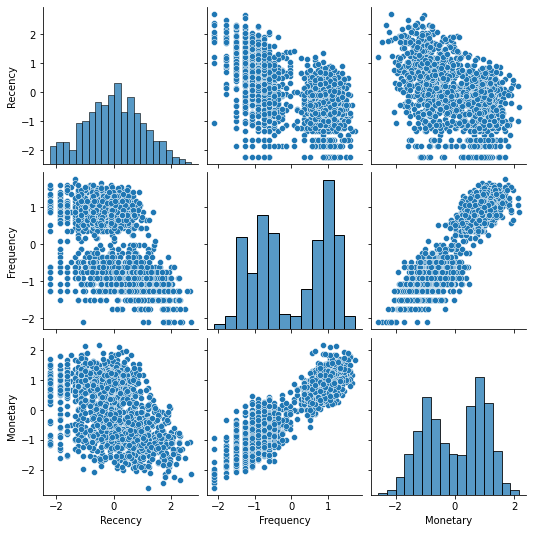

In [85]:
sns.pairplot(X)

In [86]:
SC = StandardScaler().fit(X)
X = pd.DataFrame(SC.transform(X),columns=X.columns)
X.head()

,Recency,Frequency,Monetary
0,-0.189353,1.116024,0.890317
1,-0.764874,1.399641,1.567319
2,-0.815675,1.606009,1.306427
3,-0.392072,0.341166,0.994819
4,-0.452791,1.055225,1.147624


## Creating Clusters

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


from scipy.cluster.hierarchy import cophenet,dendrogram,linkage
from scipy.spatial.distance import pdist

### Kmeans Clustering

In [88]:
Kmeans = KMeans(random_state=0).fit(X)
print("Inertia of Kmeans with default 8 clusters:",Kmeans.inertia_)

Inertia of Kmeans with default 8 clusters: 583.5896332366784


In [89]:
inertias = pd.DataFrame({"N_clusters":None,"Inertia":None},index=range(1))

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=0).fit(X)
    inertias = inertias.append({"N_clusters":i,"Inertia":kmeans.inertia_},ignore_index=True)
    

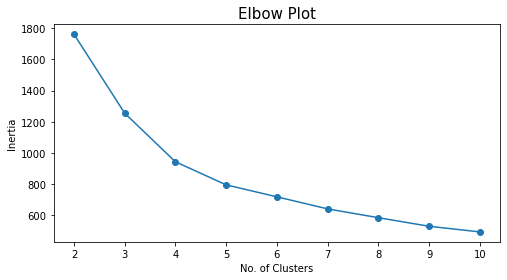

In [90]:
inertias.dropna(inplace=True)

plt.figure(figsize = (8,4))
plt.plot(inertias.N_clusters,inertias.Inertia,marker="o")
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Plot",size=15)
plt.show()

In [91]:
inertias["Silhoutte_Score"] = None
scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=0).fit(X)
    score = silhouette_score(X,kmeans.labels_)
    scores.append(score)
    
inertias["Silhoutte_Score"] = scores

In [92]:
inertias.sort_values("Silhoutte_Score",ascending=False)

,N_clusters,Inertia,Silhoutte_Score
1,2.0,1761.648867,0.548337
2,3.0,1254.330489,0.465800
3,4.0,942.463195,0.386864
4,5.0,794.402766,0.343934
5,6.0,717.629065,0.330717
8,9.0,528.587871,0.293804
6,7.0,640.105177,0.288929
9,10.0,492.239316,0.287317
7,8.0,583.589633,0.284813


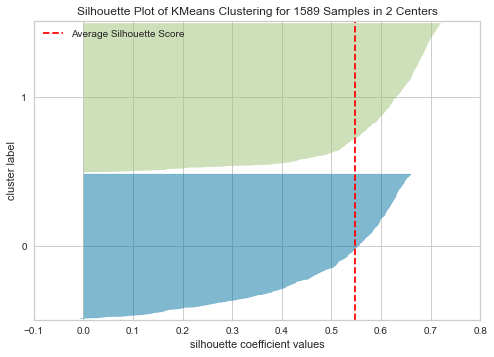

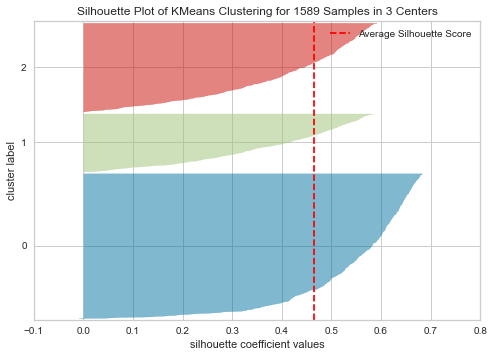

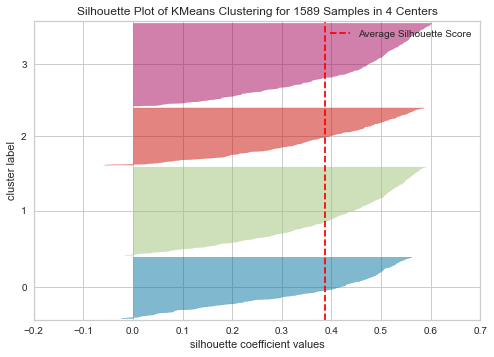

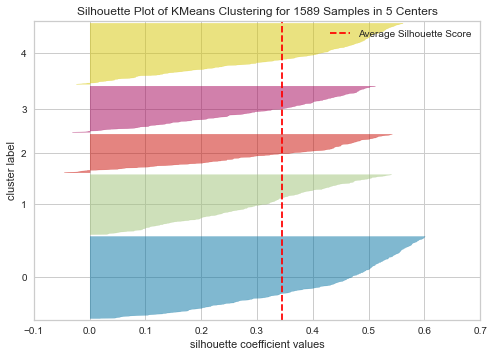

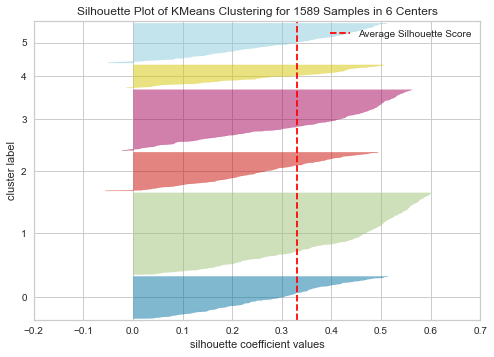

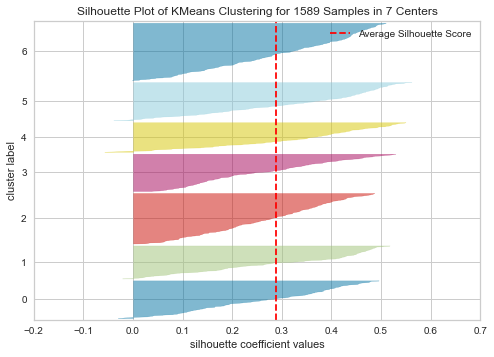

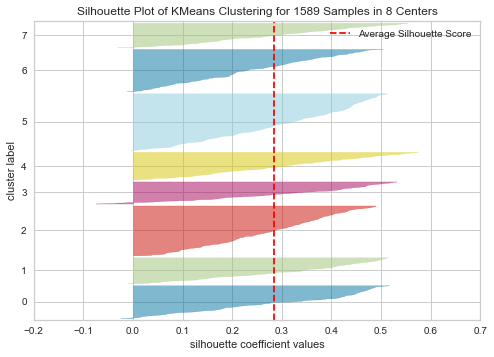

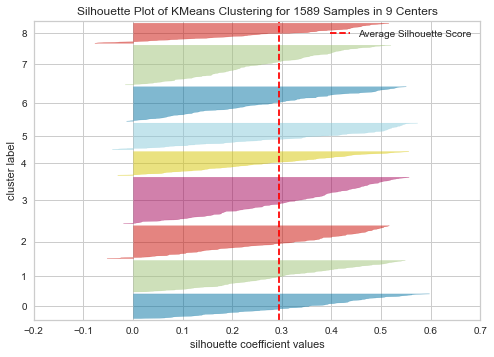

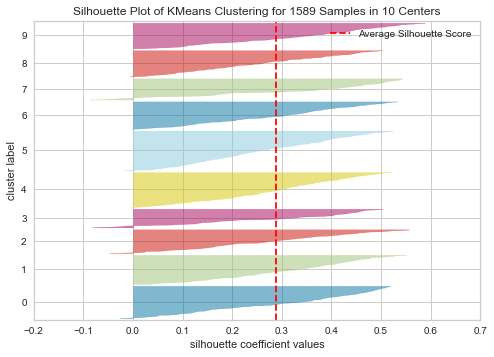

In [93]:
from yellowbrick.cluster import SilhouetteVisualizer

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

### Agglomerative Clustering
  

In [94]:
Agg = AgglomerativeClustering().fit(X)
score = silhouette_score(X,Agg.labels_)
print("Silhoutte score for Agglomerative clustering with default cluster i.e 2:",score)

Silhoutte score for Agglomerative clustering with default cluster i.e 2: 0.5461999074193357


In [95]:
agg_scores = pd.DataFrame({"N_clusters":None,"Silhoutte":None},index=range(1))

for i in range(2,11):
    agg = AgglomerativeClustering(n_clusters=i).fit(X)
    score = silhouette_score(X,agg.labels_)
    agg_scores = agg_scores.append({"N_clusters":i,"Silhoutte":score},ignore_index=True)
    

In [96]:
agg_scores.dropna(inplace=True)
agg_scores

,N_clusters,Silhoutte
1,2.0,0.546200
2,3.0,0.458092
3,4.0,0.355389
4,5.0,0.305171
5,6.0,0.267258
6,7.0,0.257201
7,8.0,0.238516
8,9.0,0.240174
9,10.0,0.239545


In [97]:
for met in ["single","average","ward","complete"]:
    for dist in ["euclidean","minkowski"]:
        if met != "ward":
            distance = linkage(X,method=met,metric=dist)
            cop = cophenet(distance,pdist(X,metric=dist))
            print(f"Cophenet coefficient for {met}-{dist}:",cop[0])
        else:
            distance = linkage(X,method=met,metric="euclidean")
            cop = cophenet(distance,pdist(X,metric="euclidean"))
            print(f"Cophenet coefficient for {met}-euclidean:",cop[0])

Cophenet coefficient for single-euclidean: 0.5991278002383167
Cophenet coefficient for single-minkowski: 0.5991278002383167
Cophenet coefficient for average-euclidean: 0.7864729051137285
Cophenet coefficient for average-minkowski: 0.7864729051137285
Cophenet coefficient for ward-euclidean: 0.7722972856323194
Cophenet coefficient for ward-euclidean: 0.7722972856323194
Cophenet coefficient for complete-euclidean: 0.7396904904668953
Cophenet coefficient for complete-minkowski: 0.7396904904668953


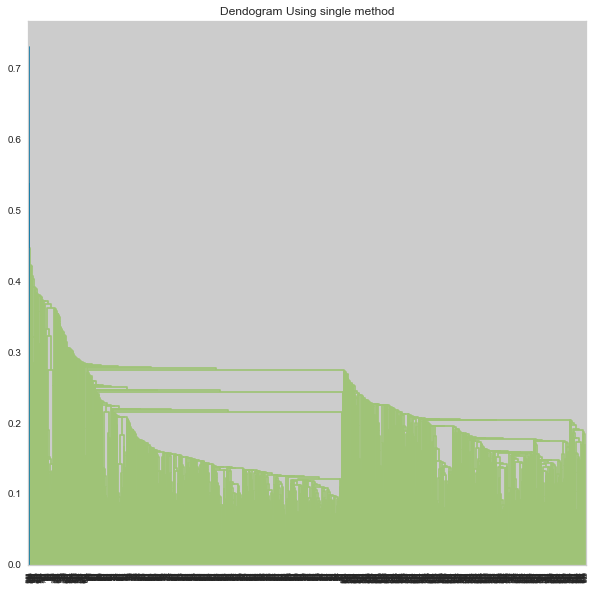

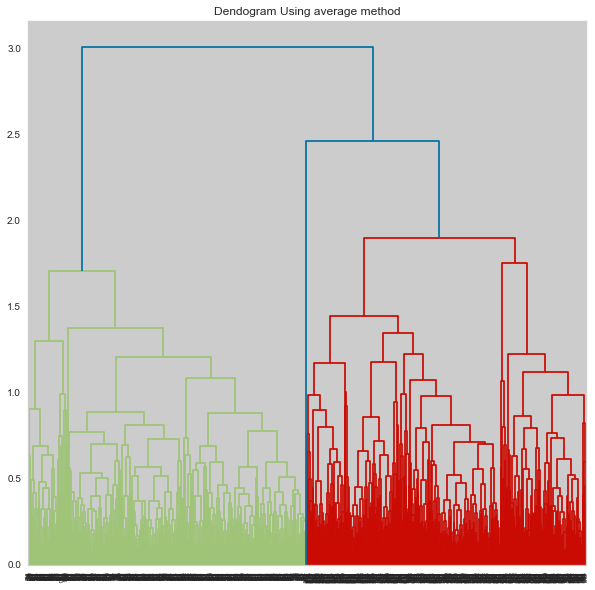

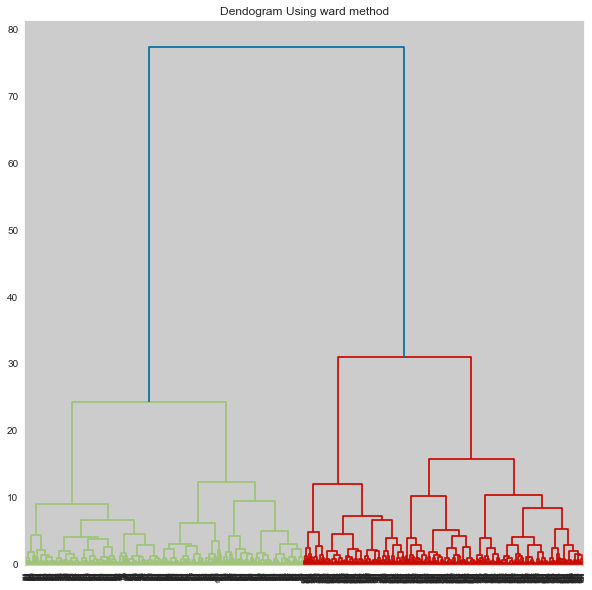

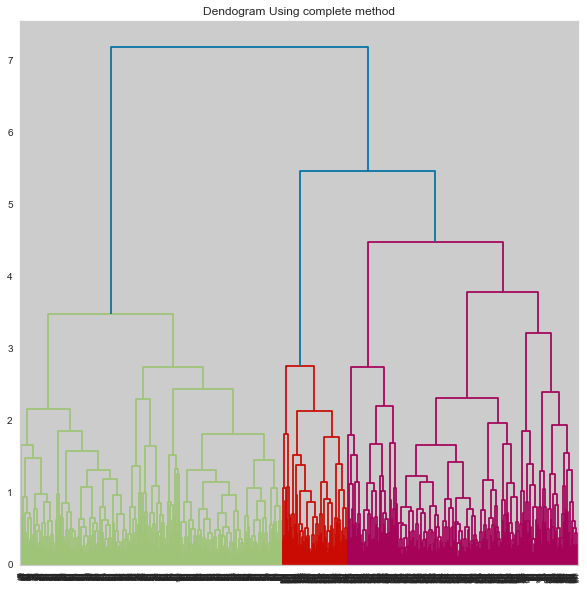

In [98]:
for metric in ["single","average","ward","complete"]:
    distance = linkage(X,method=metric)
    plt.figure(figsize=(10,10))
    dendrogram(distance)
    plt.title(f"Dendogram Using {metric} method")

In [99]:
for met in ["single","average","ward","complete"]:
    for i in [2,3]:
        agg = AgglomerativeClustering(n_clusters=i,linkage=met).fit(X)
        score = silhouette_score(X,agg.labels_)
        print(f"silhoutte coefficient with {i} cluster for {met} using euclidean distance:",score)

silhoutte coefficient with 2 cluster for single using euclidean distance: 0.2904987158605126
silhoutte coefficient with 3 cluster for single using euclidean distance: 0.2211319633726248
silhoutte coefficient with 2 cluster for average using euclidean distance: 0.5468072096051878
silhoutte coefficient with 3 cluster for average using euclidean distance: 0.46881938149833596
silhoutte coefficient with 2 cluster for ward using euclidean distance: 0.5461999074193357
silhoutte coefficient with 3 cluster for ward using euclidean distance: 0.4580919997004653
silhoutte coefficient with 2 cluster for complete using euclidean distance: 0.5229553565855489
silhoutte coefficient with 3 cluster for complete using euclidean distance: 0.3810495571564102


### Visualizing the new clusters

In [100]:
kmeans = KMeans(n_clusters=2).fit(X)
agg = AgglomerativeClustering(n_clusters=2,linkage="ward").fit(X)
customers["Kmeans_Cluster"] = kmeans.labels_
customers["Agg_Cluster"] = kmeans.labels_


In [101]:
customers["Kmeans_Cluster"] = customers.Kmeans_Cluster.apply(lambda x:f"Cluster {x}")
customers["Agg_Cluster"] = customers.Agg_Cluster.apply(lambda x:f"Cluster {x}")

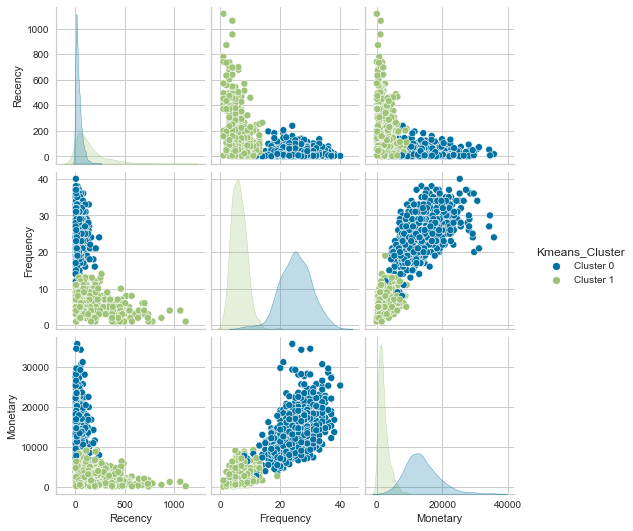

In [102]:
sns.pairplot(customers,hue="Kmeans_Cluster")

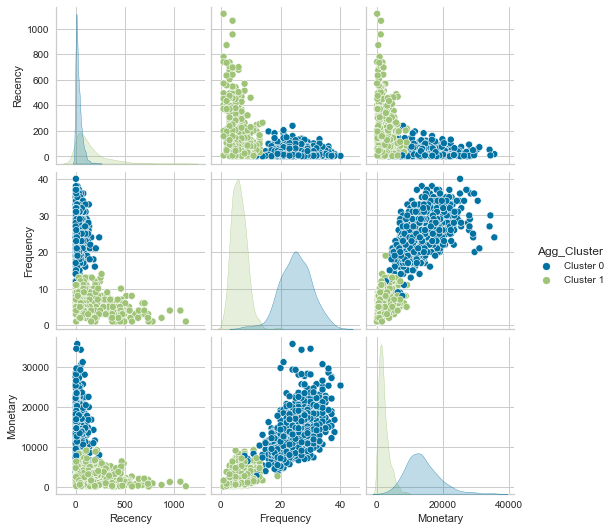

In [103]:
sns.pairplot(customers,hue="Agg_Cluster")
plt.show()

In [104]:
customers.drop("Agg_Cluster",axis=1,inplace=True)

In [105]:
customers

,Recency,Frequency,Monetary,Kmeans_Cluster
CustomerID,,,,
RH-19495,30,28,13295.7486,Cluster 0
JW-15220,12,33,23103.7263,Cluster 0
JH-15985,11,37,18863.4044,Cluster 0
GM-14695,22,17,14564.9420,Cluster 0
TB-21175,20,27,16573.5984,Cluster 0
...,...,...,...,...
DK-2985,1118,1,81.4320,Cluster 1
ZC-11910,200,1,7.1730,Cluster 1
MC-7605,195,2,208.4100,Cluster 1


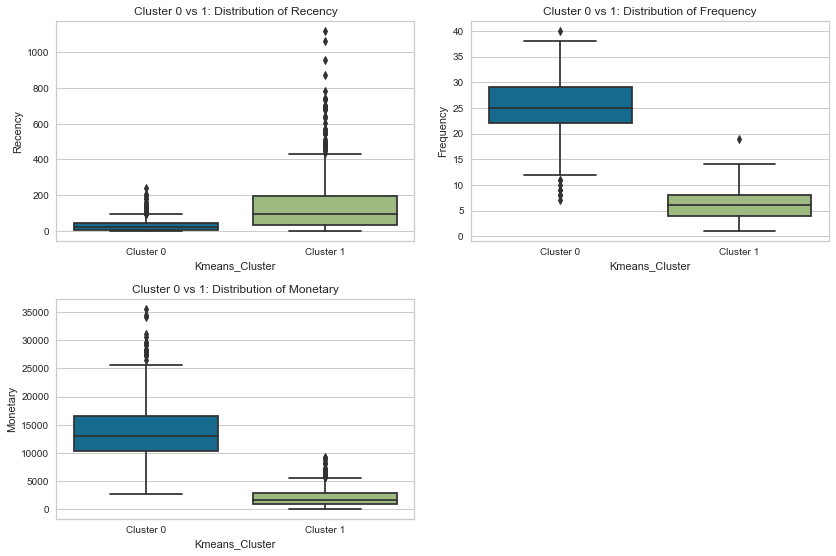

In [106]:
plt.figure(figsize=(12,8))
for index,i in enumerate(customers.columns[:-1]):
    plt.subplot(2,2,index+1)
    plt.tight_layout(pad=2,h_pad=2)
    plt.title(f"Cluster 0 vs 1: Distribution of {i}")
    sns.boxplot(y=customers[i],x=customers.Kmeans_Cluster)

In [107]:
customers[customers.Kmeans_Cluster=="Cluster 0"].describe()

,Recency,Frequency,Monetary
count,806.000000,806.000000,806.000000
mean,31.003722,25.114144,13701.058894
std,32.139467,5.216969,5041.692661
min,0.000000,7.000000,2570.994000
25%,7.000000,22.000000,10268.868700
50%,20.000000,25.000000,13046.331430
75%,43.000000,29.000000,16485.609720
max,240.000000,40.000000,35668.120800


In [108]:
customers[customers.Kmeans_Cluster=="Cluster 1"].describe()

,Recency,Frequency,Monetary
count,783.000000,783.000000,783.000000
mean,145.203065,6.121328,2042.513335
std,158.646653,2.462889,1579.114459
min,0.000000,1.000000,7.173000
25%,35.000000,4.000000,909.549000
50%,97.000000,6.000000,1648.944000
75%,193.500000,8.000000,2777.721000
max,1118.000000,19.000000,9166.209200


In [109]:
customers.reset_index(inplace=True)

In [110]:
customer_cluster = customers[["CustomerID","Kmeans_Cluster"]]

In [111]:
data = data.merge(customer_cluster,left_on="CustomerID",right_on="CustomerID")

In [112]:
data.head()

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,ProductID,Category,SubCategory,...,Quantity,Discount,Profit,ShippingCost,OrderPriority,DaysTillShipment,OrderDay,Region,Country,Kmeans_Cluster
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,TEC-AC-10003033,Technology,Accessories,...,7,0.0,762.1845,933.57,Critical,0,Weekday Order,North America,United States,Cluster 0
1,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,FUR-TA-10002903,Furniture,Tables,...,7,0.4,-290.8752,348.18,Critical,0,Weekday Order,North America,United States,Cluster 0
2,CA-2014-121538,2014-11-29,2014-02-12,First Class,RH-19495,Rick Hansen,Consumer,OFF-PA-10004071,Office Supplies,Paper,...,2,0.2,31.0688,11.36,High,-290,Weekend Order,North America,United States,Cluster 0
3,CA-2011-110639,2011-08-23,2011-08-23,Same Day,RH-19495,Rick Hansen,Consumer,OFF-PA-10004530,Office Supplies,Paper,...,4,0.0,22.5008,7.52,High,0,Weekday Order,North America,United States,Cluster 0
4,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,OFF-PA-10004621,Office Supplies,Paper,...,3,0.0,9.3312,7.24,Critical,0,Weekday Order,North America,United States,Cluster 0


## Exporting File to Sales Table in MySQL

In [113]:
from sqlalchemy import create_engine

In [114]:
my_conn = create_engine("mysql+mysqldb://root:06MYSQLkey@#@localhost/python")

In [115]:
data.head()

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,ProductID,Category,SubCategory,...,Quantity,Discount,Profit,ShippingCost,OrderPriority,DaysTillShipment,OrderDay,Region,Country,Kmeans_Cluster
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,TEC-AC-10003033,Technology,Accessories,...,7,0.0,762.1845,933.57,Critical,0,Weekday Order,North America,United States,Cluster 0
1,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,FUR-TA-10002903,Furniture,Tables,...,7,0.4,-290.8752,348.18,Critical,0,Weekday Order,North America,United States,Cluster 0
2,CA-2014-121538,2014-11-29,2014-02-12,First Class,RH-19495,Rick Hansen,Consumer,OFF-PA-10004071,Office Supplies,Paper,...,2,0.2,31.0688,11.36,High,-290,Weekend Order,North America,United States,Cluster 0
3,CA-2011-110639,2011-08-23,2011-08-23,Same Day,RH-19495,Rick Hansen,Consumer,OFF-PA-10004530,Office Supplies,Paper,...,4,0.0,22.5008,7.52,High,0,Weekday Order,North America,United States,Cluster 0
4,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,OFF-PA-10004621,Office Supplies,Paper,...,3,0.0,9.3312,7.24,Critical,0,Weekday Order,North America,United States,Cluster 0


In [116]:
data.columns

Index(['OrderID', 'OrderDate', 'ShipDate', 'ShipMode', 'CustomerID',
       'CustomerName', 'Segment', 'ProductID', 'Category', 'SubCategory',
       'ProductName', 'Sales', 'Quantity', 'Discount', 'Profit',
       'ShippingCost', 'OrderPriority', 'DaysTillShipment', 'OrderDay',
       'Region', 'Country', 'Kmeans_Cluster'],
      dtype='object')

In [117]:
data.to_sql(con=my_conn,name="sales",if_exists="replace",index=False)